# Linear Regression (Multivariable)

TODO:
- Calcuate with SykitLearn

## Goal:
Predicting house price based on area and number of badrooms.

### Import libraries

In [81]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support
from mpl_toolkits.mplot3d import Axes3D

# do ploting inline instead of in a separate window
%matplotlib inline

In [82]:
%reload_ext version_information
%version_information numpy, scipy, matplotlib, mpl_toolkits

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 16.1.0 x86_64 i386 64bit
numpy 1.11.1
scipy 0.18.1
matplotlib 1.5.3
mpl_toolkits The 'mpl_toolkits' distribution was not found and is required by the application
Tue Jan 31 22:27:36 2017 EET

### Load data

In [83]:
data = pd.read_csv("./data/house-price(area_badrooms_price).txt", names=['area', 'badrooms', 'price'], header=None)

In [84]:
data.shape

(47, 3)

In [85]:
data.head(5)

,area,badrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [86]:
data.tail(5)

,area,badrooms,price
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


In [87]:
data.isnull().values.any()

False

### Initial data visualization

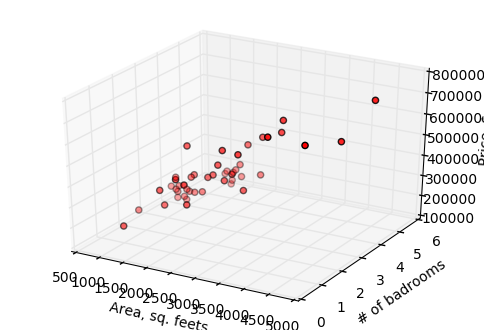

In [88]:
# plt.plot(data['area'], data['price'], 'x')
# plt.xlabel('Population, 10,000s')
# plt.ylabel('Prifit, $10,000s')
# plt.grid(True)

def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# n = 100
# for c, m, zl, zh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zl, zh)
#     ax.scatter(xs, ys, zs, c=c, marker=m)

ax.scatter(data['area'].values, data['badrooms'].values, data['price'].values, c='r', marker='o')

ax.set_xlabel('Area, sq. feets')
ax.set_ylabel('# of badrooms')
ax.set_zlabel('Price, $')

plt.show()

## Extract features and results

In [89]:
features = ['area', 'badrooms']
result = ['price']
X = data[features]
y = data[result]

## Feature Normalizing

In [90]:
mu = np.mean(X, axis=0).values
sigma = np.std(X, axis=0).values
print('Features median:')
print(mu)
print('Features standard deviation:')
print(sigma)

Features median:
[ 2000.68085106     3.17021277]
Features standard deviation:
[  7.86202619e+02   7.52842809e-01]


In [91]:
X_norm = (X - mu) / sigma
X_norm.head(5)

,area,badrooms
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205


In [92]:
X_norm['_bias'] = 1
X_norm = X_n[['_bias', 'area', 'badrooms']]
X_norm.head(5)

,_bias,area,badrooms
0,1,0.131415,-0.226093
1,1,-0.509641,-0.226093
2,1,0.507909,-0.226093
3,1,-0.743677,-1.554392
4,1,1.271071,1.102205


### Gradient descent

In [93]:
def cost(X, y, theta):
    m = len(y)
    J = 0
    for i in range(0, m):
        J = J + (np.dot(theta, X[i][np.newaxis].T) - y[i])**2;
    J = J / (2 * m);
    return float(J)

In [94]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    t_history = []
    number_of_features = len(theta)

    for iter in range(1, num_iters):
        temp = [0] * number_of_features

        for i in range(0, number_of_features):
            s = 0
            for j in range (0, m):
                s = s + (np.dot(X[j], theta) - y[j]) * X[j, i]
            temp[i] = theta[i] - alpha * s / m

        theta = temp
        J_history.append(cost(X, y, theta))

    return theta, J_history

In [95]:
theta = [0] * X_norm.shape[1]
alpha = 0.01
num_iters = 400
theta, J_h  = gradientDescent(X_norm.values, y['price'].values, theta, alpha, num_iters)

In [96]:
theta

[334240.34080558817, 99365.99989389487, 3309.4360082576563]

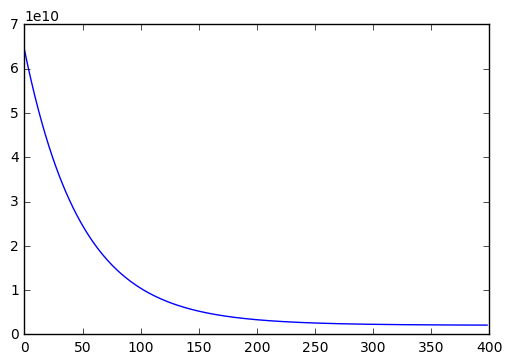

In [97]:
plt.plot(np.arange(0, len(J_h)), J_h, '-', linewidth=1)
plt.show()

#### Prediction

In [98]:
feat_to_predict = [1650, 3]
feat_to_predict_norm = np.concatenate(([1], (feat_to_predict - mu) / sigma), axis=0)
predicted_house_price = np.dot(feat_to_predict_norm, theta)
print('1650 sq-ft house with 3 badrooms could have price: {:.2f}$'.format(predicted_house_price))


1650 sq-ft house with 3 badrooms could have price: 289170.51$


### Normal equation

In [101]:
X['_bias'] = 1
X = X[['_bias', 'area', 'badrooms']]
X.head(5)

,_bias,area,badrooms
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4


In [106]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print('Result theta:')
print(theta)

Result theta:
[[ 89597.9095428 ]
 [   139.21067402]
 [ -8738.01911233]]


In [111]:
predicted_price = np.dot([1, 1650, 3], theta)
print('Predicted price for 1650 sq-ft house with 3 badrooms is: {:.2f}$'.format(float(predicted_price)))

Predicted price for 1650 sq-ft house with 3 badrooms is: 293081.46$
